In [7]:
import pandas as pd
import csv
# import numpy as np
# import os
# import matplotlib.pyplot as plt
# import random
# import torch
import json
# import seaborn as sns

from local_utils.data_utils import set_seed, viz_data, get_protov2_df, get_data_splits

#ensuring reproducibility
set_seed()

<h3>Importing data into a dataframe</h3>

In [4]:

temp = pd.read_csv("./Dataset/data/train.csv",
                 escapechar = "\\",
                 quoting = csv.QUOTE_NONE)

temp.head(8)

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat ...","[Pete the Cat Bedtime Blues plush doll,Based o...",MerryMakers,0
1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1
2,The Ultimate Self-Sufficiency Handbook: A Comp...,NaN,Skyhorse Publishing,imusti,2
3,Amway Nutrilite Kids Chewable Iron Tablets (100),NaN,"[Nutrilite Kids,Chewable Iron Tablets,Quantity...",Amway,3
4,Teacher Planner Company A4 6 Lesson Academic T...,NaN,NaN,NaN,4
5,Men'S Full Sleeve Raglan T-Shirts Denim T-Shir...,Men'S Full Sleeve Raglan T-Shirts Denim T-Shir...,"[Color: Blue,Sleeve: Full Sleeve,Material: Cot...",Bhavya Enterprise,5
6,Glance Women's Wallet (Black) (LW-21),This Black wallet by Glance will be a treasure...,[The Most Comfortable Women's Wallet That You ...,Glance,6
7,Wild Animals Hungry Brain Educational Flash Ca...,Wild Animals are the animals that mostly stays...,[Playful learning: Flash cards develops the lo...,hungry brain,7


<h3>Visualizing class distribution of data</h3>

9919
9919


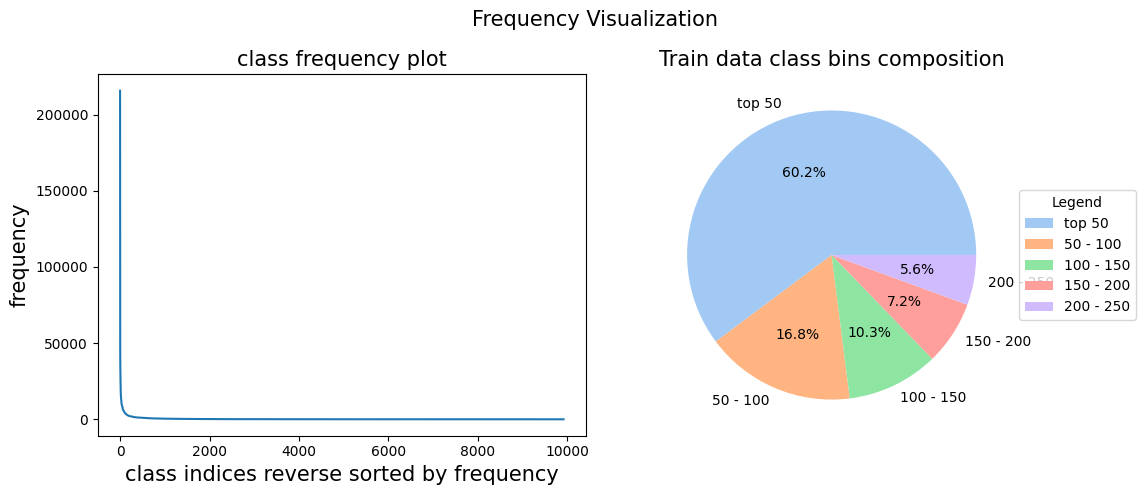

In [3]:
%matplotlib inline
viz_data(temp)

<h3> Concatenating all features into a single text feature </h3>

In [5]:
for column in temp.columns[:3]:
    temp[column].fillna(" ", inplace = True)
temp["text"] = temp['TITLE'] + temp['DESCRIPTION'] + temp['BULLET_POINTS'] #single text feature
temp = temp.drop(temp.columns[:4], axis=1)
temp = temp.reindex(columns=['text','BROWSE_NODE_ID'])
temp.head(10)

,text,BROWSE_NODE_ID
0,"Pete The Cat Bedtime Blues Doll, 14.5 InchPete...",0
1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",1
2,The Ultimate Self-Sufficiency Handbook: A Comp...,2
3,Amway Nutrilite Kids Chewable Iron Tablets (10...,3
4,Teacher Planner Company A4 6 Lesson Academic T...,4
5,Men'S Full Sleeve Raglan T-Shirts Denim T-Shir...,5
6,Glance Women's Wallet (Black) (LW-21)This Blac...,6
7,Wild Animals Hungry Brain Educational Flash Ca...,7
8,Hindi Barakhadi Educational Flash Cards for Ki...,7
9,Chapin 1380 Premier Pro 3-Gallon Tri-Poxy Stee...,9


<h3> relabelling for continuity </h3>

In [8]:
with open('./Dataset/lbl2id.json') as json_file:
    lbl2id_from_json = json.load(json_file)
keys = list(lbl2id_from_json.keys())
intkeys = map(int, keys) 
values =  list(lbl2id_from_json.values())
lbl2id= dict(zip(intkeys, values))   

temp["BROWSE_NODE_ID"]=temp["BROWSE_NODE_ID"].map(lbl2id)

<h3>Capping the max samples per class and keeping the most frequent classes</h3>

In [9]:
protov2_df = get_protov2_df(temp,
                            greater_than = 1800,
                            max_samples_per_class = 6500)

10/250 : class id 956, % of available samples : 0.25454260651629074, total samples added : 6500.0
20/250 : class id 693, % of available samples : 0.41432942376338605, total samples added : 6500.0
30/250 : class id 599, % of available samples : 0.605834653742194, total samples added : 6500.0
40/250 : class id 524, % of available samples : 0.7031588057118131, total samples added : 6500.0
50/250 : class id 580, % of available samples : 0.7751937984496124, total samples added : 6500.0

################# samples in protov2 df : 331500 ##################

60/250 : class id 311, % of available samples : 0.9643916913946587, total samples added : 6500.0
70/250 : class id 527, % of available samples : 1, total samples added : 6065
80/250 : class id 166, % of available samples : 1, total samples added : 5453
90/250 : class id 1043, % of available samples : 1, total samples added : 5028
100/250 : class id 396, % of available samples : 1, total samples added : 4527

################# samples in pro

<h3>Visualizing class distribution of processed data</h3>

250
250


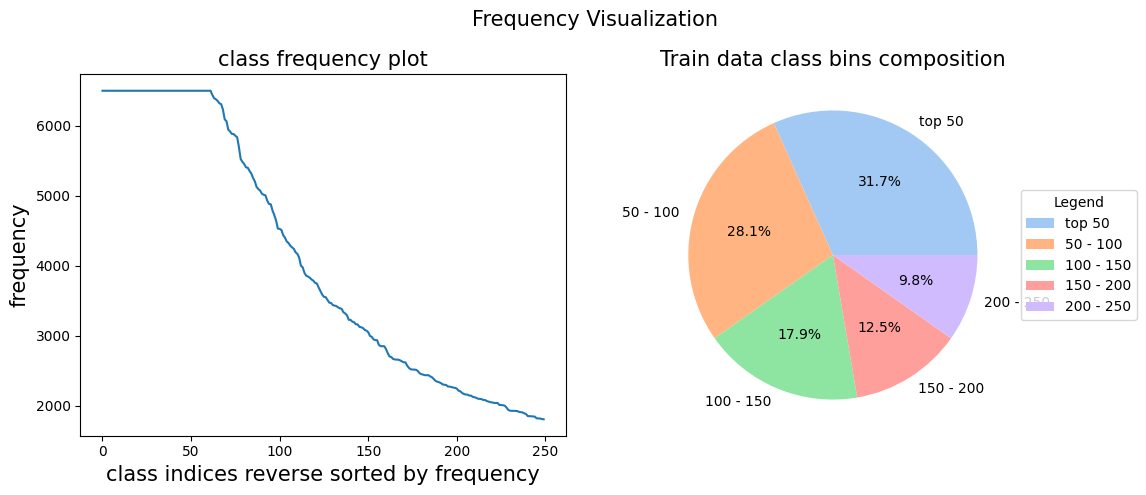

In [16]:
%matplotlib inline
viz_data(protov2_df)

<h3>Splitting dataset into train and test</h3>

In [14]:
train_df, test_df = get_data_splits(protov2_df)

<h3>Saving processed data for tokenization and training</h3>

In [15]:
train_df.to_csv("./Dataset/traindata_protov2.csv", index = False)
test_df.to_csv("./Dataset/testdata_protov2.csv", index = False)